## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
#Importing drive submodule from colab module in google library
from google.colab import drive

#Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change your present working directory

In [0]:
#Importing os library
import os

In [0]:
#Change working directory
os.chdir('/content/drive/My Drive')

### Load your data file

In [0]:
#Importing pandas library
import pandas as pd

#Read CSV
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')

#Sorting Dataset by index
df.sort_index(inplace=True)

In [5]:
#Checking first 5 records of the Dataset
df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### Plot data

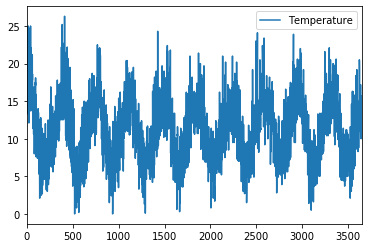

In [6]:
#Plotting data
df.plot()

#### Descibe your dataframe

In [7]:
#Describing the DataFrame
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [8]:
#Check for null values
df.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Drop null values

In [0]:
#There are no Null values in the Dataset

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1877297f0>]],
      dtype=object)

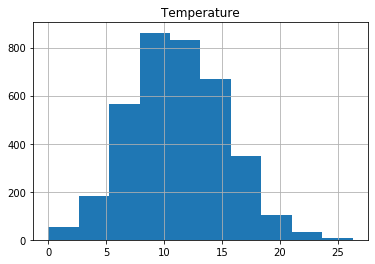

In [10]:
#Plotting Histogram
df.hist()

#### Check the maximum and minimum values

In [11]:
#Printing maximum and minimum values for Temperature column
print("Maximum value of Temperature is",df['Temperature'].max())
print("Minimum value of Temperature is",df['Temperature'].min())

Maximum value of Temperature is 26.3
Minimum value of Temperature is 0.0


### Normalize the data

In [0]:
#Importing MinMaxScaler submodule from preprocessing module in sklearn library
from sklearn.preprocessing import MinMaxScaler

In [0]:
#Initializing MinMaxScaler
scaler = MinMaxScaler()

#Dropping Date column
df.drop('Date', axis=1, inplace=True)

#Normalize the data
scaled = scaler.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [14]:
#Printing maximum and minimum values for scaled data
print("Maximum value of scaled data is",scaled.max())
print("Minimum value of scaled data is",scaled.min())

Maximum value of scaled data is 1.0
Minimum value of scaled data is 0.0


#### Look into some of the scaled values

In [15]:
#Printing few random scaled values
print("Some of the scaled values are:", scaled[5][0], ",", scaled[10][0], ",", scaled[16][0])

Some of the scaled values are: 0.6007604562737643 , 0.6159695817490494 , 0.7832699619771863


### Split data into Training and Testing

In [0]:
#80% examples will used for training (in the begining)
train_size = int(len(scaled) * 0.80)

#20% will be used for Test
test_size = len(scaled - train_size)

#Splitting data into Training & Testing
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]

#### Print train and test size

In [17]:
#Printing train & test size
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2920
test: 730


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
#Importing numpy library
import numpy as np

#Defining create_dataset to get Y column
def create_dataset(dataset, loop_back=1):
    #Creating empty lists for X & Y
    dataX, dataY = [], []
    
    #Loop for all records in dataset
    for i in range(len(dataset)-loop_back):
        #Getting values from dataset equal to loop_back times
        a = dataset[i:(i+loop_back), 0]
        #Appedning to X Data
        dataX.append(a)
        #Getting value from dataset loop_back count later & appending to Y Dataset
        dataY.append(dataset[i + loop_back, 0])
        
    #Returning Array of X data & Y data
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [0]:
#Create Input and Output
window_size = 1
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [0]:
#Make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))

## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [21]:
#Importing tensorflow library
import tensorflow as tf

#Clearing session
tf.keras.backend.clear_session()

#Instantiating Sequential model
model = tf.keras.Sequential()

#Adding LSTM Layer with memory size of 32
model.add(tf.keras.layers.LSTM(32, input_shape=(window_size, 1)))

#Adding Dense layer with 1 neuron
model.add(tf.keras.layers.Dense(1))

#Compiling the Model
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Summarize your model

In [22]:
#Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [23]:
#Training the model for 200 epochs & batch size of 32
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2919 samples, validate on 729 samples
Epoch 1/200
2919/2919 [==============================] - 1s 256us/sample - loss: 0.0979 - val_loss: 0.0274
Epoch 2/200
2919/2919 [==============================] - 0s 88us/sample - loss: 0.0159 - val_loss: 0.0133
Epoch 3/200
2919/2919 [==============================] - 0s 87us/sample - loss: 0.0136 - val_loss: 0.0123
Epoch 4/200
2919/2919 [==============================] - 0s 86us/sample - loss: 0.0128 - val_loss: 0.0114
Epoch 5/200
2919/2919 [==============================] - 0s 89us/sample - loss: 0.0119 - val_loss: 0.0105
Epoch 6/200
2919/2919 [==============================] - 0s 89us/sample - loss: 0.0113 - val_loss: 0.0097
Epoch 7/200
2919/2919 [==============================] - 0s 88us/sample - loss: 0.0107 - val_loss: 0.0090
Epoch 8/200
2919/2919 [==============================] - 0s 85us/sample - loss: 0.0103 - val_loss: 0.0086
Epoch 9/20

## Make Predictions and Evaluate your model

In [0]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [25]:
#Evaluate model
model.evaluate(X_test, y_test)

729/729 [==============================] - 0s 40us/sample - loss: 0.0082


0.008174141856173593

## Plot the results

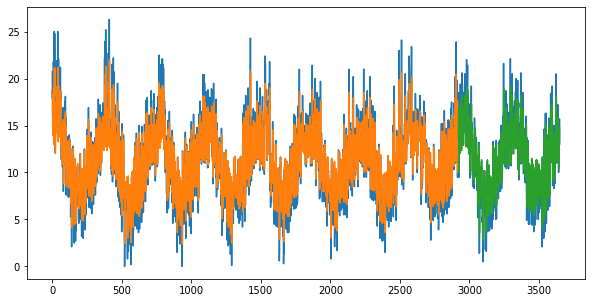

In [26]:
#Importing pyplot module from matplotlib library
import matplotlib.pyplot as plt
#Making plots to get shown
%matplotlib inline

#Un-normalize the predited data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
trainPredict = trainPredict.reshape(-1,1)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = testPredict.reshape(-1,1)
testPredict = scaler.inverse_transform(testPredict)

#Shift train predictions for plotting
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
#Shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict
#Plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()